# Getting Packages

In [1]:
import numpy as np
import cv2
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

# Load The Data

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Data Augmentation Methods 
>1- Rotate <br>
>2- Scale  <br>
>3- Translate <br>
>4- Flip   <br>
>5- Shear  <br>
>6- Zoom   <br>

In [3]:
def Rotate(image, angle=45):
    
    h, w = image.shape
    
    center = (w / 2, h / 2)
    
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))
    
    return rotated_image


def Scale(image, X=5, Y=5 ):
    
    h, w = image.shape
    
    scaled_image = cv2.resize(image, None, fx=X, fy=Y)
    
    return scaled_image


def Translate(image, X=10, Y=10):
    h, w = image.shape
    
    translation_matrix = np.float32([[1, 0, X], [0, 1, Y]])
    
    translated_image = cv2.warpAffine(image, translation_matrix, (w, h))
    
    return translated_image


def Flip(image):

    return cv2.flip(image, 1)



def Shear(image, Shear=0.8):

    h, w = image.shape
        
    shear_matrix = np.float32([[1, Shear, 0], [0, 1, 0]])
    
    sheared_image = cv2.warpAffine(image, shear_matrix, (w, h))
    
    return sheared_image



def Zoom(image, Zoom= 0.5):
    
    h, w = image.shape

    center = (w / 2, h / 2)
    
    zoom_matrix = cv2.getRotationMatrix2D(center, 0, Zoom)
    
    zoomed_image = cv2.warpAffine(image, zoom_matrix, (w, h))
    
    return zoomed_image

# Visualize Data Augmentation

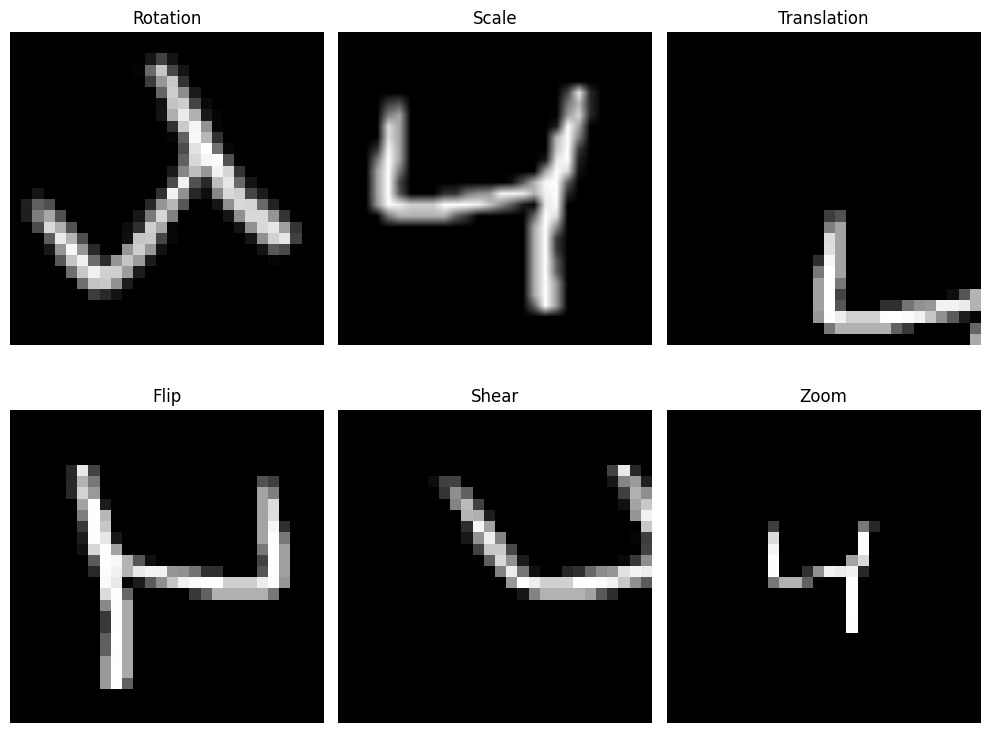

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

# Define names for augmentations
augmentation_names = ["Rotation", "Scale", "Translation", "Flip", "Shear", "Zoom"]

augmentation_functions = [Rotate, Scale, Translate, Flip, Shear, Zoom]

for i in range(6):

    original_image = x_train[2]

    augmented_image = augmentation_functions[i](original_image)

    row = i // 3  # حساب الصف
    col = i % 3  # حساب العمود

    ax = axes[row, col]
    ax.imshow(augmented_image, cmap='gray')
    ax.set_title(augmentation_names[i])  
    ax.axis('off')

plt.tight_layout()
plt.show()

# Thank U !!